# Introduction to Data Science
## Homework 4 

Student Name: Iryna Nazirbaeva

Student Netid: in479
***

### Part 1: Basic evaluations
For this part of the assignment, we are going to use another (different) churn data set, located in `data/churn.csv`. The first 11 columns are predictor variables.

```
COLLEGE                       college educated?
INCOME                        income
OVERAGE                       average overcharges per month
LEFTOVER                      average % leftover minutes per month
HOUSE                         value of dwelling (from census tract)
HANDSET_PRICE                 cost of phone
OVER_15MINS_CALLS_PER_MONTH   average number of long calls per month
AVERAGE_CALL_DURATION         average call duration
REPORTED_SATISFACTION         reported level of satisfaction
REPORTED_USAGE_LEVEL          self-reported usage level
CONSIDERING_CHANGE_OF_PLAN    was customer considering changing plan?
```

The last column, `LEAVE`, is the target variable that equals one if the user left and zero if they stayed.

1\. Load the data into a pandas `DataFrame()`.

In [7]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
from sklearn.cross_validation import KFold

#from dstools import data_tools

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [8]:
# Load the data
data = pd.read_csv("data/churn_data.csv")
data.head()



COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0        0   31953        0         6  313378            161   
1        1   36147        0        13  800586            244   
2        1   27273      230         0  305049            201   
3        1   29215      208        85  224784            241   
4        0  133728       64        48  632969            626   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                           21                      1            very_unsat   
4                            3                      2                 unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no      0  
1               little                considering      0  
2          very_little                    perhaps      0  
3               little              never_thought      0  
4                 high                         no      0

2\. Some of the columns are categorical variables. You have to turn these into zero/one **"dummy" variables**.  

The idea is that for modeling methods like logistic regression which take only numeric inputs, we should change categorical variables. Basically, we must create one (new) **binary variable** for each value of the categorical. Technically if there are k values, we really need only to create new variables for k-1 of the categories, but often we create k new variables with all categories anyway, as that makes the model more interpretable.

The following code is to help you understanding dummy variables, you might need to change it.


In [9]:

for field in ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']:
    
    #Take all UNIQUE categories from each column 
    
    for value in data[field].unique():
    
        # In the DataFrame called "data", create a new column with the original name + the category name
        # This new column will be created by "False" and "True" for each unique value in the field.
        # Then, those True and False values can be transformed into  "integer" (e.g. 1 and 0)
        
        data[field + "_" + value] = pd.Series(data[field] == value,dtype=int)

        
    # Drop the original field (column), we only want to keep the new "dummy variables"
    # Look at the them at the end of the data frame that will be printed after running this cell
    
    data = data.drop([field], axis=1)
    
    
data.tail()


COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
11147        0   82056      244        11  964443            297   
11148        0  105890       73         7  397776            820   
11149        0  153252        0        23  368403            597   
11150        1  107126       71        82  237397            609   
11151        0   78674       47        41  572406            288   

       OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  LEAVE  \
11147                           26                      4      0   
11148                           25                     14      0   
11149                            1                      6      0   
11150                            5                      2      0   
11151                            4                      2      1   

       REPORTED_SATISFACTION_unsat  \
11147                            0   
11148                            0   
11149                            0   
11150                            0   
11151                            0   

                              ...                           \
11147                         ...                            
11148                         ...                            
11149                         ...                            
11150                         ...                            
11151                         ...                            

       REPORTED_USAGE_LEVEL_little  REPORTED_USAGE_LEVEL_very_little  \
11147                            1                                 0   
11148                            1                                 0   
11149                            1                                 0   
11150                            0                                 1   
11151                            1                                 0   

       REPORTED_USAGE_LEVEL_high  REPORTED_USAGE_LEVEL_very_high  \
11147                          0                               0   
11148                          0                               0   
11149                          0                               0   
11150                          0                               0   
11151                          0                               0   

       REPORTED_USAGE_LEVEL_avg  CONSIDERING_CHANGE_OF_PLAN_no  \
11147                         0                              1   
11148                         0                              0   
11149                         0                              0   
11150                         0                              1   
11151                         0                              0   

       CONSIDERING_CHANGE_OF_PLAN_considering  \
11147                                       0   
11148                                       1   
11149                                       0   
11150                                       0   
11151                                       1   

       CONSIDERING_CHANGE_OF_PLAN_perhaps  \
11147                                   0   
11148                                   0   
11149                                   0   
11150                                   0   
11151                                   0   

       CONSIDERING_CHANGE_OF_PLAN_never_thought  \
11147                                         0   
11148                                         0   
11149                                         0   
11150                                         0   
11151                                         0   

       CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it  
11147                                                  0    
11148                                                  0    
11149                                                  1    
11150                                                  0    
11151                                                  0    

[5 rows x 24 columns]

3\. Put all of the predictors into a data frame called `X` and the target variable in a data frame called `Y`.

In [10]:
Y = data["LEAVE"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: LEAVE, dtype: int64

In [11]:
X = data.drop(['LEAVE'],axis=1)
X.head()


COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0        0   31953        0         6  313378            161   
1        1   36147        0        13  800586            244   
2        1   27273      230         0  305049            201   
3        1   29215      208        85  224784            241   
4        0  133728       64        48  632969            626   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  \
0                            0                      4   
1                            0                      6   
2                           16                     15   
3                           21                      1   
4                            3                      2   

   REPORTED_SATISFACTION_unsat  REPORTED_SATISFACTION_very_unsat  \
0                            1                                 0   
1                            1                                 0   
2                            1                                 0   
3                            0                                 1   
4                            1                                 0   

                          ...                           \
0                         ...                            
1                         ...                            
2                         ...                            
3                         ...                            
4                         ...                            

   REPORTED_USAGE_LEVEL_little  REPORTED_USAGE_LEVEL_very_little  \
0                            1                                 0   
1                            1                                 0   
2                            0                                 1   
3                            1                                 0   
4                            0                                 0   

   REPORTED_USAGE_LEVEL_high  REPORTED_USAGE_LEVEL_very_high  \
0                          0                               0   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          1                               0   

   REPORTED_USAGE_LEVEL_avg  CONSIDERING_CHANGE_OF_PLAN_no  \
0                         0                              1   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              1   

   CONSIDERING_CHANGE_OF_PLAN_considering  CONSIDERING_CHANGE_OF_PLAN_perhaps  \
0                                       0                                   0   
1                                       1                                   0   
2                                       0                                   1   
3                                       0                                   0   
4                                       0                                   0   

   CONSIDERING_CHANGE_OF_PLAN_never_thought  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it  
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

[5 rows x 23 columns]

3\. Create `LogisticRegression()` and `DecisionTreeClassifier()` models. For the tree-structured model, use `criterion="entropy"` and `min_samples_split=50` (the latter to make sure the tree is not making decisions from too few data). For all other settings, keep the default values. 

For these models, obtain the accuracy estimates (average) and standard deviations based on cross-validation with different fold values: 2, 5, 10, 20, 50, and 75. 
Store your results in **lr_all_acc**, **dt_all_acc**, **lr_all_std**, **dt_all_std**

In [21]:
# Defining the Logistic Regression model

model_log_reg = LogisticRegression()
model_log_reg.fit(X, Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# Defining the tree model

tree_model = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)  

# Let's tell the model what is the data
tree_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:

cv_number_folds = [2,5,10,20,50,75]

# Logistic regression cross-validation accuracies
lr_all_acc = []   
lr_all_std = []

# Decision tree cross-validation accuracies
dt_all_acc = []
dt_all_std = []

for i in cv_number_folds:
    model = DecisionTreeClassifier()
    model.fit(X,Y)
    dt_all_acc.append(np.mean(cross_val_score(model, X, Y, cv = i)))
    dt_all_std.append(np.std(cross_val_score(model, X, Y, cv = i)))
    
    model_lr = LogisticRegression()
    model_lr.fit(X,Y)
    lr_all_acc.append(np.mean(cross_val_score(model_lr, X, Y, cv = i)))
    lr_all_std.append(np.std(cross_val_score(model_lr, X, Y, cv = i)))
    

# These lines will be used for GRADING. Ensure that they print what they should.

print ( "Logistic regression folds: Mean Accuracy %.4f" % (np.mean(lr_all_acc)))
print ("Tree folds: Mean Accuracy %.4f" % (np.mean(dt_all_acc)) )


Logistic regression folds: Mean Accuracy 0.9098
Tree folds: Mean Accuracy 0.8420


4\. Now **plot** your results: for each modeling method, plot the average generalization performance with +/- one standard deviation error bars.  **Explain** what the graph reveals. ** Explain:** which number of folds would you select and why? 

Here is how the plots should look like  

_Hint:  plt.errorbar might be helpful_

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

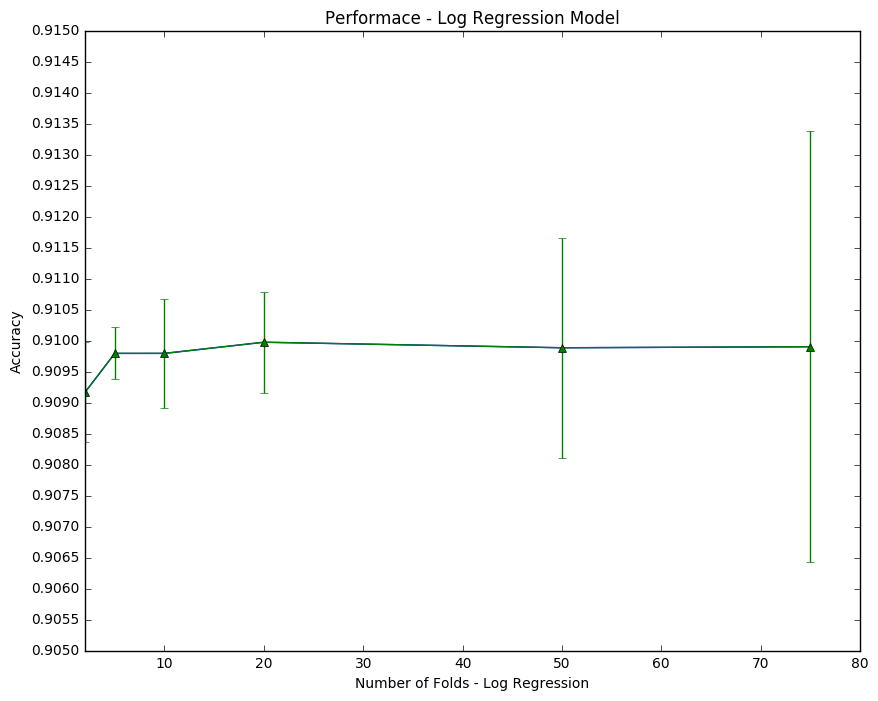

In [73]:
fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1) 

plt.plot(cv_number_folds, lr_all_acc)
plt.errorbar(cv_number_folds, lr_all_acc, lr_all_std, marker='^')
plt.title("Performace - Log Regression Model")
plt.xlabel("Number of Folds - Log Regression")
plt.ylabel("Accuracy")
plt.ylim([0.907, 0.913])
plt.xlim([2,80])
major_ticks = np.arange(0.905, 0.915, 0.0005)                                       
ax.set_yticks(major_ticks)                                                         
plt.show()


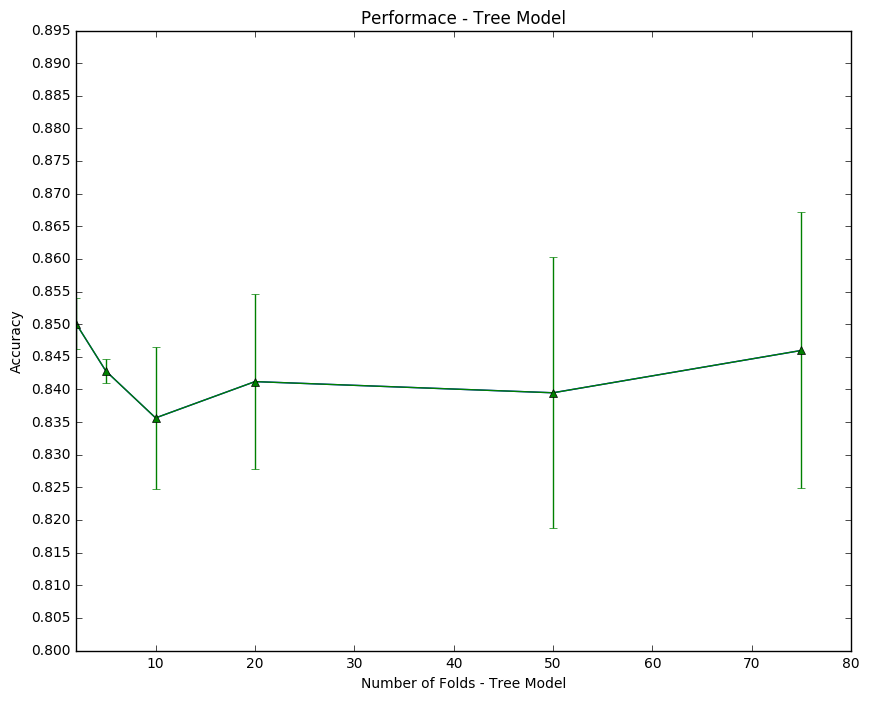

In [72]:

## CODE FOR YOUR GRAPHS HERE: 

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1) 

plt.plot(cv_number_folds, dt_all_acc)
plt.errorbar(cv_number_folds, dt_all_acc, dt_all_std, marker='^')
plt.title("Performace - Tree Model")
plt.xlabel("Number of Folds - Tree Model")
plt.ylabel("Accuracy")
plt.ylim([0.815, 0.88])
plt.xlim([2,80])
major_ticks = np.arange(0.8, 0.9, 0.005)                                       
ax.set_yticks(major_ticks)  
plt.show()


** Answers here! **
The graph revelas...

I would select the ... number of folds because...
***

5\. Create the same **plots** for a different evaluation metric: Area under the ROC curve (AUC score).  (**Read Chapter 8**) 

**Do you draw the same conclusions?**  Which metric would you prefer for this problem?

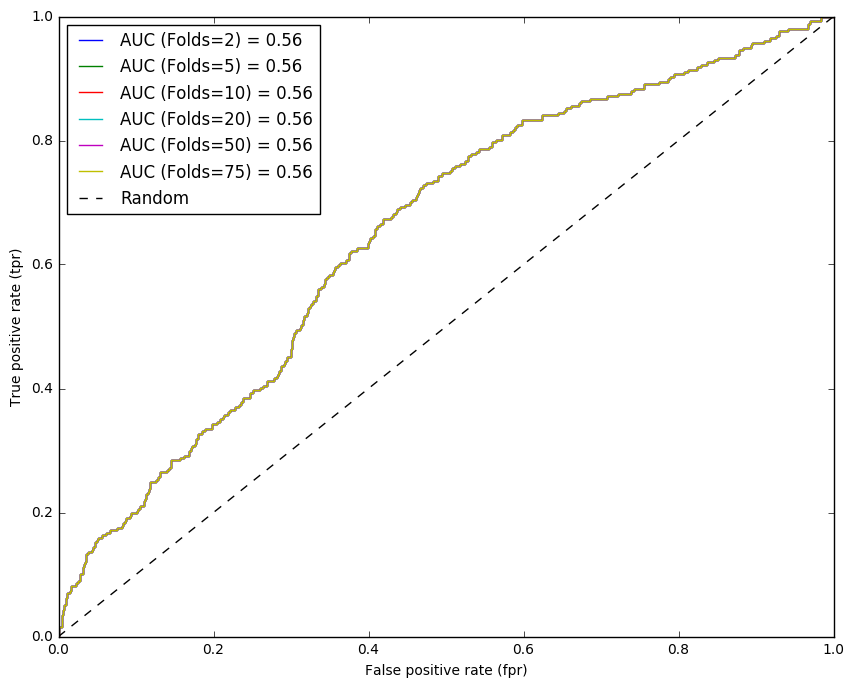

In [78]:
# Split train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

cv_number_folds = [2,5,10,20,50,75]

# Logistic regression cross-validation auc
lr_all_auc = []   
lr_all_std = []

# Fit a logistic regression model
for i in cv_number_folds:
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    lr_all_std.append(np.std(cross_val_score(model, X, Y, cv = i)))

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    tpr, fpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)

    # Get the area under the curve (AUC)
    acc = np.mean(cross_val_score(model, X, Y, scoring="accuracy"))
    lr_all_auc = np.mean(cross_val_score(model, X, Y, scoring="roc_auc", cv = i))

    # Plot the ROC curve
    plt.plot(tpr, fpr, label="AUC (Folds=" + str(i) + ") = " + str(round(auc, 2)))

    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)









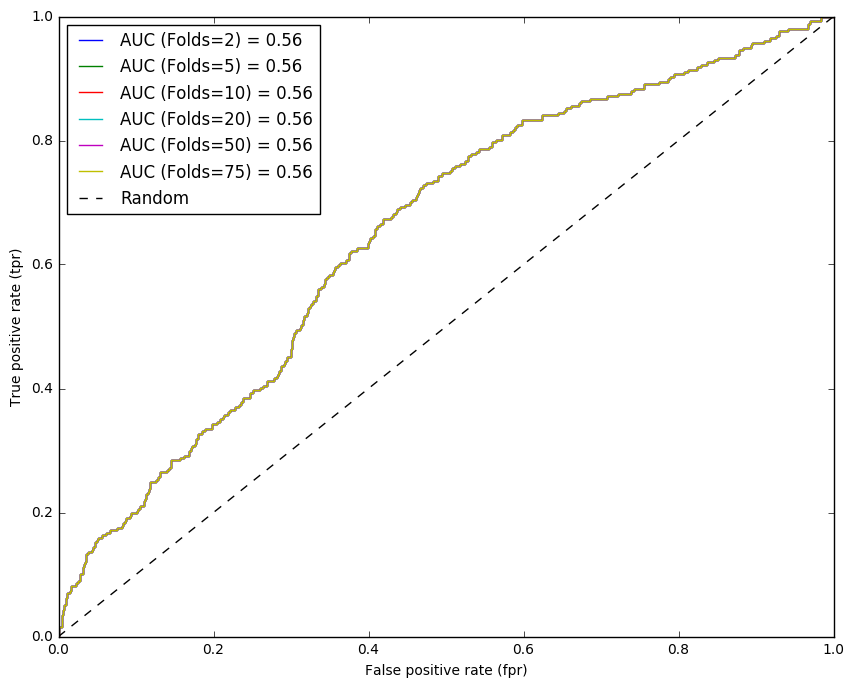

In [79]:
# Decision tree cross-validation auc
dt_all_auc = []
dt_all_std = []


# Fit a tree model
for i in cv_number_folds:
    model_tree = DecisionTreeClassifier()
    model_tree.fit(X_train, Y_train)

# Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    tpr, fpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)

# Get the area under the curve (AUC)
    acc = np.mean(cross_val_score(model_tree, X, Y, scoring="accuracy", cv = i))
    dt_all_auc = np.mean(cross_val_score(model_tree, X, Y, scoring="roc_auc"))

# Plot the ROC curve
    plt.plot(tpr, fpr, label="AUC (Folds=" + str(i) + ") = " + str(round(auc, 2)))

     
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

** Answer here! **
The model with AUC 0.76, which is a tree model with the tree depth 5.
***

### Part 2: Find the best model

1\. Create `LogisticRegression()` and `DecisionTreeClassifier()` models. For the logistic regression **find the optimal value** for regularization (`C`) using 10-fold cross validation and area under the ROC curve (AUC). Use the same procedure to find the optimal value of `min_samples_split` for the decision tree classifier (criterion='entropy'). For each of these values, try 20 different choices. To show your results, **create two plots**, one for each modeling method, that show the value of AUC on the y-axis and the parameter values you tried on the x-axis. **Don't forget to label your axes!**  

[Hint 1: for a coarse search of the space of complexity parameters a good heuristic is to cover the range with an exponentially increasing set of values.  We're already doing that with C.  How could you get a good coverage of the range of possible min_samples_split?] 

[Hint 2: Plotting with a log scale on the x-axis sometimes helps. Note we're already doing that by plotting C.]

In [82]:

# Code to test and create a plot for LogisticRegression() here

#model_log_reg = LogisticRegression()
#model_log_reg.fit(X, Y)

# Plot different regularization values for L1 and L2 regularization. We penilize either by L1 or L2. 
for regularization in ['L2', 'L1']:
    # Get a table of the model coefficients
    coefs = pd.DataFrame(columns=['C'] + list(X.columns))
    
    # Print what we are doing
    print ("\nFitting with %s regularization: \n" % regularization)
    position = 0
    
    # Try some regularization values
    for i in range(0,20): #running through the range
        # Modeling
        c = np.power(10.0, i) #powers of 10
        model_log_reg = LogisticRegression(penalty=regularization.lower(), C=c)  
        model_log_reg.fit(X, Y)
        
    
        # Update coefficient table
        coefs.loc[i] = [c] + list(model_log_reg.coef_[0])
    # Print and plot
    #print (coefs.to_string(index=False))
    #plt.tight_layout()
    #plt.show()




Fitting with L2 regularization: 


Fitting with L1 regularization: 



In [ ]:

# Code to test and create a plot for DecisionTreeClassifier() here
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, Y)




2\. Split your data to create different training sets with size 10%, 20%, 40%, 80%, and 90% of the size of the original data set. Fit two models for the different training sets: decision tree (entropy criteria) and logistic regression. Use the **best parameters** from the previous question and 10-fold cross validation. Plot the **learning curves** for the two models on one plot, including +/- one standard deviation error bars and using auc score.  Use log scale on the x-axis (hint: using basex=2 looks much nicer than the default). Make sure your plot has a legend so that you can tell which curve is related to which model. **Don't forget to label your axes **.  

**Explain what the learning curves reveal**.

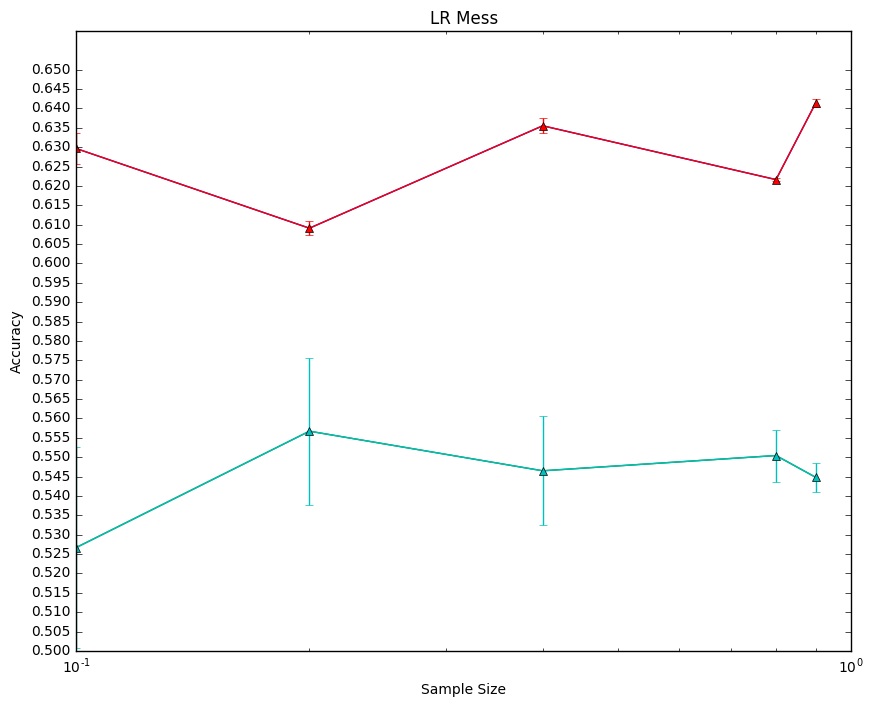

In [97]:

from sklearn.model_selection import train_test_split
sample_sizes = [.1, .2, .4, .8, .9]
lr_std = []
lr_auc = []
dt_auc = []
dt_std = []

for i in sample_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i)
    
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train, Y_train)
    dt_std.append(np.std(cross_val_score(model, X_train, Y_train, cv = 10)))
    dt_auc.append(np.mean(cross_val_score(model, X_train, Y_train, scoring="roc_auc", cv = 10)))
    
    model_lr = LogisticRegression(C=5) #change C
    model_lr.fit(X_train, Y_train)
    lr_std.append(np.std(cross_val_score(model_lr, X_train, Y_train, cv = 10)))
    lr_auc.append(np.mean(cross_val_score(model_lr, X_train, Y_train, scoring="roc_auc", cv= 10)))
 

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1) 

plt.plot(sample_sizes, lr_auc)
plt.plot(sample_sizes, dt_auc )
plt.errorbar(sample_sizes, lr_auc, lr_std, marker='^')
plt.errorbar(sample_sizes, dt_auc, dt_std, marker='^')
plt.title("LR Mess")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
ax.set_xscale('log')
#plt.ylim([0.0005, 0.1])
#plt.xlim([0,0.9])
major_ticks = np.arange(0.5, 0.65, 0.005)                                       
ax.set_yticks(major_ticks)  
plt.show()







### Part 3: Find the best model: **GRID SEARCH**

Ok. So sklearn provides a function that searches for the best modeling paramenters, as you did above.  This is very much "machine learning style" modeling, where as much as possible is inferred from the data--in particular, even the right values for the modeling parameters.

1\. Use the sklearn function GridSearchCV to perform a grid search. This is a search through the modeling parameters that we have been using before (e.g. regularization "c", min_samples_split, ...). They are called "hyper-parameters" and we want to find the best coombination of them for our model (not individually like we did it before).   

This grid-search function uses a Python **dictionary** to lay out the values that we want to search among. 

Then, using the same lists of values that you used above (e.g. all the min_samples_split of Part2, question1), create a dictionary and use it for the grid search.

Example: GridSearchCV( DecisionTreeClassifier(), parameters_dictionary )

[You can find the documentation here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)


In [106]:

from sklearn.model_selection import GridSearchCV

#gs = GridSearchCV(estimator=LogisticRegression(C=5),
    #param_grid={'n_neighbors': range(1, 50), 'weights':['uniform', 'distance']},
    #cv=10) #change c
#gs.fit(X_train, Y_train)
#gs.grid_scores_

clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=10)
gs.fit(X_train, Y_train)

print ('gs.best_score_:', gs.best_score_)



TypeError: __init__() missing 1 required positional argument: 'param_grid'

2\. Which are the best values for regularization and min_samples_split with this function? Did they change?

In [ ]:

gs.best_estimator_




3\. Evaluate the grid search again but this time include in the dictionary for logistic regression a list with penalty 'l1' and 'l2'. Also, for the decision tree, include a list of values for "min_samples_leaf= [100, 200, 300, 400, 500, 1000]". 

**What is the best selection for logistic regression and decision tree now?**

*Ok.  One last thing.  In the above analysis, although we found a set of best parameters, we chose them from performance over many cross-validations.  Thus, we made modeling decisions using the test sets.  That's fine for choosing the hyperparameters, but compromises our estimates of the final accuracy (which you did not report).  Technically, if we want good estimates of the accuracy of the resultant models, we should do our evaluation on a test set that was not used to make *any* modeling decisions.  The book discusses "nested cross-validation" as a technique to accomplish this.  This is not required for the homework, but if you want to challenge yourself to do what a top-notch data scientist would do, use nested cross-validation to do the grid search for the best parameters *using data only from the training folds*, and then build the model for the test folds with the chosen parameter.  Or, alternatively, hold out a final test set at the beginning for the final testing.*  


No answer required.